# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,5)
sns.set()
import time

In [2]:
# Import SKLearn Modules 


from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.naive_bayes import  GaussianNB # NB 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC # SMM 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer, KNNImputer


In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';', na_values="unknown")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
imputer = SimpleImputer(strategy='most_frequent')

df_imputed_cat = pd.DataFrame(
    imputer.fit_transform(df.select_dtypes("object")), columns=df.select_dtypes("object").columns)
df_imputed_cat


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [6]:
new_df = pd.concat([df_imputed_cat, df.select_dtypes(["int", "float"])], axis=1)

In [7]:
new_df = (new_df.iloc[:, 0:16]).drop(columns=["previous", "month", "day_of_week", "pdays", "campaign"]).copy()

In [8]:
(df["emp.var.rate"]).value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [9]:
new_df


,job,marital,education,default,housing,loan,contact,poutcome,y,age,duration
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no,56,261
1,services,married,high.school,no,no,no,telephone,nonexistent,no,57,149
2,services,married,high.school,no,yes,no,telephone,nonexistent,no,37,226
3,admin.,married,basic.6y,no,no,no,telephone,nonexistent,no,40,151
4,services,married,high.school,no,no,yes,telephone,nonexistent,no,56,307
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nonexistent,yes,73,334
41184,blue-collar,married,professional.course,no,no,no,cellular,nonexistent,no,46,383
41185,retired,married,university.degree,no,yes,no,cellular,nonexistent,no,56,189
41186,technician,married,professional.course,no,no,no,cellular,nonexistent,yes,44,442


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        41188 non-null  object
 1   marital    41188 non-null  object
 2   education  41188 non-null  object
 3   default    41188 non-null  object
 4   housing    41188 non-null  object
 5   loan       41188 non-null  object
 6   contact    41188 non-null  object
 7   poutcome   41188 non-null  object
 8   y          41188 non-null  object
 9   age        41188 non-null  int64 
 10  duration   41188 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 3.5+ MB


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

#### Duplicates 
After removing columns from the dataset, we end up with 22,000 duplicated rows, I will probably drop those and it doesnt make sense to have 22,000 of the same datapoint

In [11]:
new_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'age', 'duration'],
      dtype='object')

In [12]:
interested_cols = [
    "age",
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "y"]

new_df = df[interested_cols].copy()


In [13]:
new_df.duplicated().value_counts()

True     26097
False    15091
dtype: int64

In [14]:
new_df.drop_duplicates(inplace=True)

In [15]:
new_df.isna().sum()

age             0
job           238
marital        72
education    1151
default      4257
housing       810
loan          810
y               0
dtype: int64

#### Columns To Be OneHotEncoded Except the Target column `y`

#### Removing `.` from the dataset and striping the spaces 

In [16]:
for i in new_df.select_dtypes("object").columns:
    new_df[i] = new_df[i].str.replace(".", " ", regex=False)
    new_df[i] = new_df[i].str.strip()
new_df.head()


,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic 4y,no,no,no,no
1,57,services,married,high school,NaN,no,no,no
2,37,services,married,high school,no,yes,no,no
3,40,admin,married,basic 6y,no,no,no,no
4,56,services,married,high school,no,no,yes,no


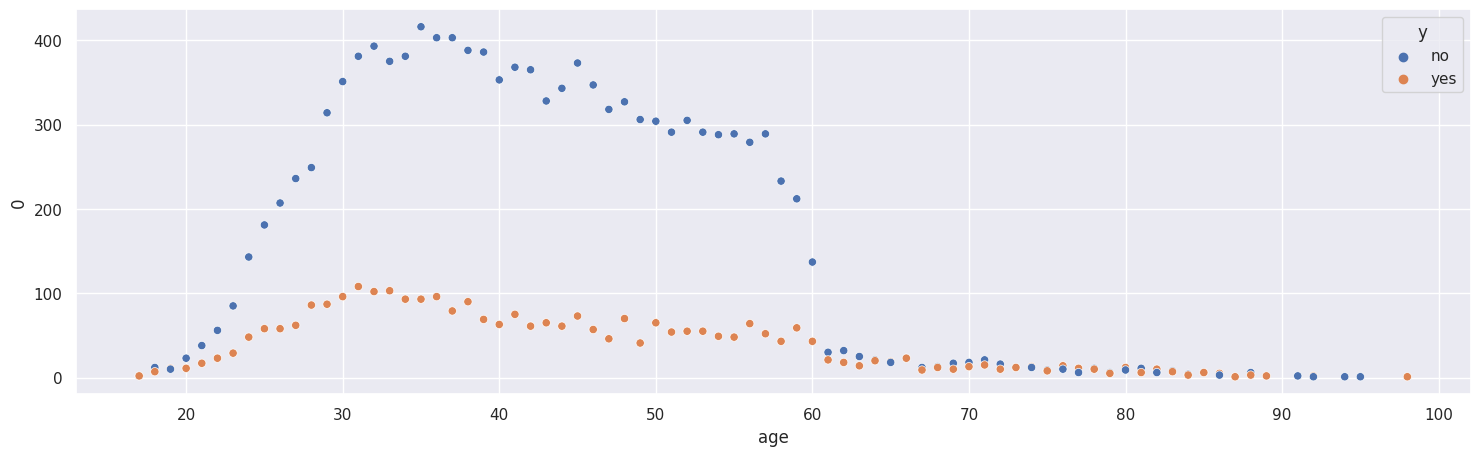

In [17]:
vc_grpby = new_df.groupby("age")[["y"]].value_counts().reset_index().sort_values(by=0, ascending=False)
sns.scatterplot(vc_grpby, x="age", y=0, hue="y");



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

#### LabelEncode the `y` Column

In [18]:
le = LabelEncoder()
new_df["target"] = le.fit_transform(new_df["y"])

In [19]:
new_df.drop_duplicates(inplace=True)

In [20]:
X = new_df.drop(columns=["y", "target"])
y = new_df["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [22]:
round(y.value_counts(normalize=True) * 100, 4)

0    80.5049
1    19.4951
Name: target, dtype: float64

In [23]:
dummy = DummyClassifier().fit(X, y).score(X, y)
round(dummy * 100, 4)

80.5049

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [24]:

col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False), X.select_dtypes("object").columns.to_list()),
])

pipe = Pipeline([
    ("transformer", col_transformer),
    ("lr", LogisticRegression(random_state=42, max_iter=1000))
])


#### Calculate the train time for LogisticRegression

In [25]:
start = time.perf_counter()

pipe.fit(X_train, y_train)

end = time.perf_counter()

total_time = end - start
print(f" Time Take to train : {round(total_time, 4)} sec")

 Time Take to train : 0.0826 sec


### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
score = pipe.score(X_test, y_test)
y_pred = pipe.predict(X_train)

acc_score = accuracy_score(y_train, y_pred)

score, acc_score

(0.814708480565371, 0.7996781217457162)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "SVM": SVC(),
    "NB": GaussianNB()
}

col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False), X.select_dtypes("object").columns.to_list()),
    ("scaler", StandardScaler(), X.select_dtypes(["int", "float"]).columns.to_list())
])


In [28]:
model_result = {
    "Model": [],
    "Train Time (sec)": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}

for name, model in models.items():
    pipe = Pipeline([
        ("transformer", col_transformer),
        (name, model)
    ])
    start = time.perf_counter()
    pipe.fit(X_train, y_train)
    end = time.perf_counter()
    total_time = end - start
    
    # getting accuracy score 
    train_y_pred = pipe.predict(X_train)
    test_y_pred = pipe.predict(X_test)
    
    train_acc_score = accuracy_score(y_train, train_y_pred)
    test_acc_score = accuracy_score(y_test, test_y_pred)
    
    # writing to df
    model_result["Model"].append(name)
    model_result["Train Time (sec)"].append(round(total_time, 3))
    model_result["Train Accuracy"].append(round(train_acc_score, 3))
    model_result["Test Accuracy"].append(round(test_acc_score, 3))
    
    

In [29]:
pd.DataFrame(model_result)

,Model,Train Time (sec),Train Accuracy,Test Accuracy
0,LogReg,0.091,0.799,0.814
1,KNN,0.020,0.817,0.768
2,DT,0.052,0.900,0.657
3,SVM,6.358,0.802,0.814
4,NB,0.027,0.330,0.322


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
    * **less feature caused lots of duplicates in the dataset and removing the duplicate brought down the number of observations and models performed poorly, hence, adding more features to the dataset and testing again**

<br>

- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Setting Hyperparameters

**Models And ParamGrids For Each Model**

In [34]:
model_param = {
    "LogReg":{ 
        "model": LogisticRegression(max_iter=10000, random_state=42),
        "params": {
            'LogReg__C': [0.001, 0.01, 0.1, 1],
            'LogReg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        }
    },
    "KNN":{
        "model": KNeighborsClassifier(),
        "params": {
            'KNN__n_neighbors': [3, 5, 11, 19],
            'KNN__weights': ['uniform', 'distance'],
            'KNN__metric': ['euclidean', 'manhattan'],    
        }
    },
    "DT":{
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'DT__max_depth': [3, 5, 10],
            'DT__max_features': ['sqrt', 'log2'],
        }
    },
    "SVM":{
        "model": SVC(),
        "params": {
            'SVM__C': [0.1, 1],
            'SVM__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
        }
    }
}



col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False), X.select_dtypes("object").columns.to_list()),
    ("scaler", StandardScaler(), X.select_dtypes(["int", "float"]).columns.to_list())
])

In [35]:
new_df.duplicated().value_counts()

False    15091
dtype: int64

In [36]:
model_result = {
    "Model": [],
    "Train Time (sec)": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Best Estimator": [],
}

for key in model_param:
    param_grid = model_param[key]["params"]
    model = model_param[key]["model"]
    
    pipe = Pipeline([
        ("transformer", col_transformer),
        (key, model)
    ])
    grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring="recall")
    
        
    start = time.perf_counter()
    grid.fit(X_train, y_train)
    end = time.perf_counter()
    
    total_time = end - start
    
    # getting accuracy score 
    train_y_pred = grid.predict(X_train)
    test_y_pred = grid.predict(X_test)
    
    train_acc_score = accuracy_score(y_train, train_y_pred)
    test_acc_score = accuracy_score(y_test, test_y_pred)
    
    # writing to df
    model_result["Model"].append(name)
    model_result["Train Time (sec)"].append(round(total_time, 3))
    model_result["Train Accuracy"].append(round(train_acc_score, 3))
    model_result["Test Accuracy"].append(round(test_acc_score, 3))
    model_result["Best Estimator"].append(grid.best_params_)


pd.DataFrame(model_result)


,Model,Train Time (sec),Train Accuracy,Test Accuracy,Best Estimator
0,NB,2.965,0.799,0.814,"{'LogReg__C': 1, 'LogReg__solver': 'newton-cg'}"
1,NB,2.801,0.830,0.735,"{'KNN__metric': 'euclidean', 'KNN__n_neighbors..."
2,NB,0.288,0.810,0.797,"{'DT__max_depth': 10, 'DT__max_features': 'sqrt'}"
3,NB,15.545,0.721,0.726,"{'SVM__C': 1, 'SVM__kernel': 'sigmoid'}"


##### Questions